In [94]:
# load date
# check and clean data
# group by
# data viz

In [95]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [96]:
df = pd.read_csv('lift_analysis_assignment.csv', low_memory=False)

In [97]:
df.head()

,email,event_date,event_type,action,total
0,4867784685125632,2015-10-26 21:38:03.911350,delivered,window_shopping,-1
1,5352432066363392,2015-10-26 21:37:57.871980,delivered,window_shopping,-1
2,6024938649550848,2015-10-26 21:37:57.853210,delivered,window_shopping,-1
3,6191500064980992,2015-10-26 21:37:58.867800,delivered,window_shopping,-1
4,5786846443339776,2015-10-26 21:37:56.331130,delivered,window_shopping,-1


In [171]:
#df.total.value_counts()

In [186]:
#df.iloc[1:3,:2]

,email,event_date
1,5352432066363392,2015-10-26 21:37:57.871980
2,6024938649550848,2015-10-26 21:37:57.853210


In [189]:
df.loc[[True, True,False,True]]

,email,event_date,event_type,action,total
0,4867784685125632,2015-10-26 21:38:03.911350,delivered,window_shopping,-1
1,5352432066363392,2015-10-26 21:37:57.871980,delivered,window_shopping,-1
3,6191500064980992,2015-10-26 21:37:58.867800,delivered,window_shopping,-1


In [98]:
# check event_date type
df.event_date.dtype

dtype('O')

In [99]:
#change event_type
df.event_date = pd.to_datetime(df.event_date)

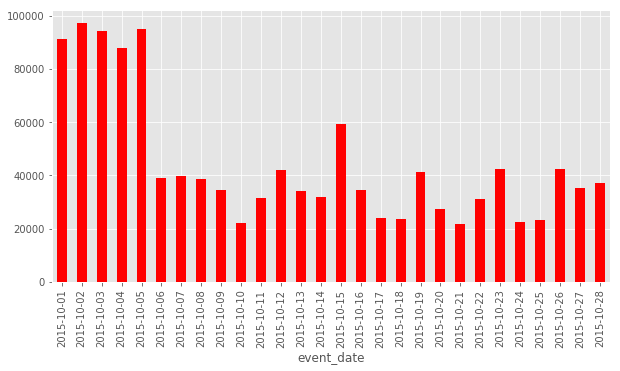

In [44]:
# plot event_date range
plt.rcParams['figure.figsize'] = 10,5
#plt.bar([df.event_date.dt.date],density=True, bins =100)
df.groupby([df.event_date.dt.date]).count()['event_date'].plot(kind = 'bar', color= 'r')

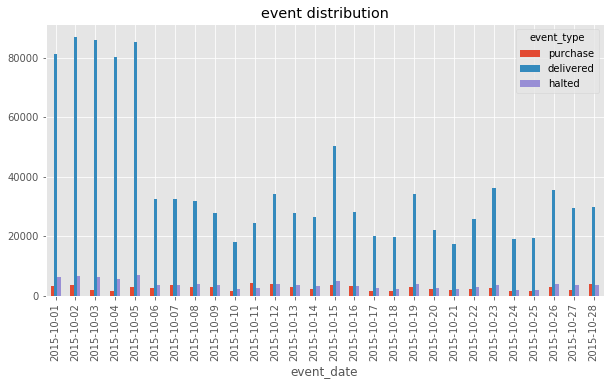

In [62]:
#event type and action check
df.groupby([df.event_date.dt.date,df.event_type]).count()['event_date'].unstack().reset_index().plot(kind='bar', x='event_date', y=['purchase','delivered','halted'], title = 'event distribution')


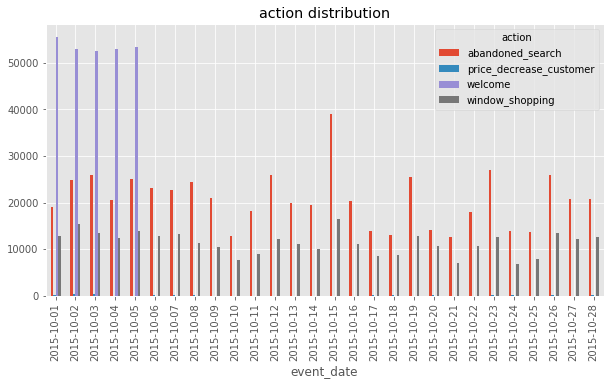

In [64]:
# welcome email in the first 5 days
df.groupby([df.event_date.dt.date,df.action]).count()['event_date'].unstack().reset_index().plot(kind='bar', x='event_date', y=['abandoned_search','price_decrease_customer','welcome','window_shopping'], title = 'action distribution')


In [100]:
# action distribution for BC and control
df_control = df[df.event_type == 'halted'].reset_index(drop = True)
df_bc = df[df.event_type == 'delivered'].reset_index(drop= True)
df_purchase = df[df.event_type == 'purchase'].reset_index(drop=True)

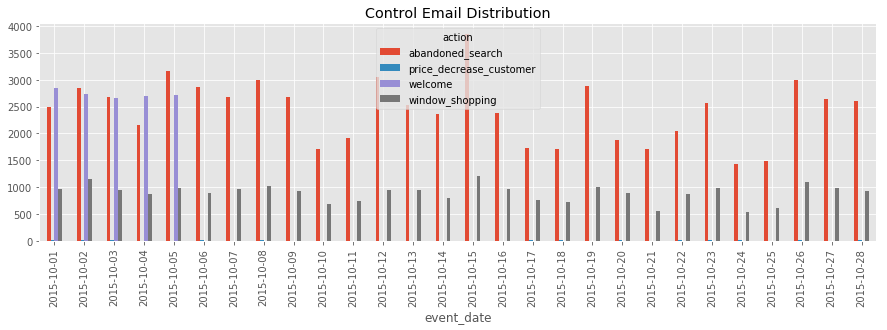

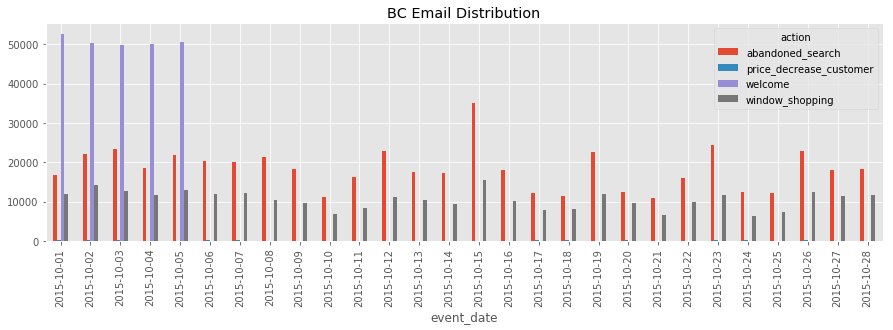

In [114]:
plt.rcParams['figure.figsize'] = 15,4
df_control.groupby([df_control.event_date.dt.date, df_control.action]).count()['event_date'].unstack().reset_index().plot(kind = 'bar', x='event_date',title='Control Email Distribution')

plt.rcParams['figure.figsize'] = 15,4
df_bc.groupby([df_bc.event_date.dt.date, df_bc.action]).count()['event_date'].unstack().reset_index().plot(kind = 'bar', x='event_date',title='BC Email Distribution')

In [133]:
df_control_purchase  = df_control.merge(df_purchase, on = 'email', how = 'left')

In [156]:
# df_control_purchase[(df_control_purchase.email == 4649485472890880) &((df_control_purchase.event_date_y - df_control_purchase.event_date_x).dt.days  <=5)] \
# .groupby(['email','event_date_y','total_y']).count().reset_index()[['email','event_date_y','total_y']]

,email,event_date_y,total_y
0,4649485472890880,2015-10-02 17:09:10.326790,149.99
1,4649485472890880,2015-10-02 17:18:17.404060,69.99
2,4649485472890880,2015-10-07 18:53:13.621550,29.99
3,4649485472890880,2015-10-20 19:38:42.098060,12.99


In [159]:
df_control_purchase_within5 = df_control_purchase[(df_control_purchase.event_date_y - df_control_purchase.event_date_x).dt.days  <=5] \
.groupby(['email','event_date_y','total_y']).count().reset_index()[['email','event_date_y','total_y']] #4649485472890880

In [163]:
df_control_purchase_within5.shape

(1932, 3)